**US MASS SHOOTING**

An Exploratory Analysis has been performed in order to uncover hidden insights.

In [2]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import matplotlib as mpl
import seaborn as sns
from geopy.geocoders import Nominatim
color = sns.color_palette()

import plotly.offline as py
import plotly.graph_objs as go
from plotly import tools
from plotly.offline import iplot, init_notebook_mode
init_notebook_mode()

%matplotlib inline

pd.options.mode.chained_assignment = None
pd.options.display.max_columns = 999

In [5]:
# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory


# Any results you write to the current directory are saved as output.

ms = pd.read_csv("Mass Shootings Dataset.csv", encoding = "ISO-8859-1", parse_dates=["Date"])
print("Data Dimensions are: ", ms.shape)

Data Dimensions are:  (398, 13)


*Total shooting attacks are 398.*

In [6]:
ms.columns

Index(['S#', 'Title', 'Location', 'Date', 'Summary', 'Fatalities', 'Injured',
       'Total victims', 'Mental Health Issues', 'Race', 'Gender', 'Latitude',
       'Longitude'],
      dtype='object')

In [7]:
ms.head()

S#                                 Title            Location       Date  \
0   1         Las Vegas Strip mass shooting       Las Vegas, NV 2017-10-01   
1   2            San Francisco UPS shooting   San Francisco, CA 2017-06-14   
2   3     Pennsylvania supermarket shooting     Tunkhannock, PA 2017-06-07   
3   4  Florida awning manufacturer shooting    Orlando, Florida 2017-06-05   
4   5      Rural Ohio nursing home shooting  Kirkersville, Ohio 2017-05-12   

                                             Summary  Fatalities  Injured  \
0                                                NaN          58      515   
1  Jimmy Lam, 38, fatally shot three coworkers an...           3        2   
2  Randy Stair, a 24-year-old worker at Weis groc...           3        0   
3  John Robert Neumann, Jr., 45, a former employe...           5        0   
4  Thomas Hartless, 43, shot and killed a former ...           3        0   

   Total victims Mental Health Issues   Race Gender  Latitude  Longitude  
0            573              Unclear    NaN    NaN       NaN        NaN  
1              5                  Yes  Asian      M       NaN        NaN  
2              3              Unclear  White      M       NaN        NaN  
3              5              Unclear    NaN      M       NaN        NaN  
4              3                  Yes  White      M       NaN        NaN

In [8]:
ms = ms.sort_values('Date')

**Lets see how many  people had been affected since 1966**

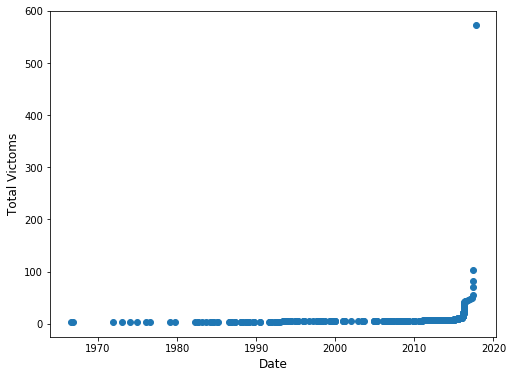

In [9]:
plt.figure(figsize=(8,6))
plt.scatter(np.sort(ms['Date']), np.sort(ms['Total victims'].values))
plt.xlabel('Date', fontsize=12)
plt.ylabel('Total Victoms', fontsize=12)
plt.show()

We see a sudden increase in 2016. Let's look deeper into 2016 incidents history.

In [10]:
# mass shooting by date
ms_perdate = np.asarray(ms.groupby('Date')['Fatalities'].sum())

# thirty day moving average of ms fatalites by date
ms_average = pd.Series(ms_perdate).rolling(window=30).mean()
ms_average = np.asarray(ms_average.drop(ms_average.index[:397]))
ms_average = np.round(ms_average, 0)

ms_dates = np.arange('2016-01', '2017-01', dtype='datetime64[D]')
ms_range = ms_dates[15:351]

trace_date = go.Scatter(
             x = ms_dates,
             y = ms_perdate,
             mode = 'lines',
             name = 'Fatalities',
             line = dict(
                 color = 'rgb(215, 0, 0)',
                 width = 3)
             )

trace_mean = go.Scatter(
             x = ms_range,
             y = ms_average,
             mode = 'lines',
             name = 'Average',
             line = dict(
                 color = 'rgb(215, 0, 0)',
                 width = 5),
             opacity = 0.33
             )

layout = go.Layout(
         title = 'Mass Shooting Fatalities by Date in United States <br>'
                 '<sub>Hover & Rescale Plot to Desired Dates</sub>',
         showlegend = False,
         xaxis = dict(
             rangeslider = dict(thickness = 0.05),
             type = 'date',
             showline = True,
             showgrid = False
         ),
         yaxis = dict(
             range = [0, 65],
             autotick = False,
             tick0 = 10,
             dtick = 10,
             showline = True,
             showgrid = False)
         )

data = [trace_date, trace_mean]
figure = dict(data = data, layout = layout)
iplot(figure)

ValueError: Invalid property specified for object of type plotly.graph_objs.layout.YAxis: 'autotick'

    Valid properties:
        anchor
            If set to an opposite-letter axis id (e.g. `x2`, `y`),
            this axis is bound to the corresponding opposite-letter
            axis. If set to "free", this axis' position is
            determined by `position`.
        automargin
            Determines whether long tick labels automatically grow
            the figure margins.
        autorange
            Determines whether or not the range of this axis is
            computed in relation to the input data. See `rangemode`
            for more info. If `range` is provided, then `autorange`
            is set to False.
        calendar
            Sets the calendar system to use for `range` and `tick0`
            if this is a date axis. This does not set the calendar
            for interpreting data on this axis, that's specified in
            the trace or via the global `layout.calendar`
        categoryarray
            Sets the order in which categories on this axis appear.
            Only has an effect if `categoryorder` is set to
            "array". Used with `categoryorder`.
        categoryarraysrc
            Sets the source reference on plot.ly for  categoryarray
            .
        categoryorder
            Specifies the ordering logic for the case of
            categorical variables. By default, plotly uses "trace",
            which specifies the order that is present in the data
            supplied. Set `categoryorder` to *category ascending*
            or *category descending* if order should be determined
            by the alphanumerical order of the category names. Set
            `categoryorder` to "array" to derive the ordering from
            the attribute `categoryarray`. If a category is not
            found in the `categoryarray` array, the sorting
            behavior for that attribute will be identical to the
            "trace" mode. The unspecified categories will follow
            the categories in `categoryarray`. Set `categoryorder`
            to *total ascending* or *total descending* if order
            should be determined by the numerical order of the
            values. Similarly, the order can be determined by the
            min, max, sum, mean or median of all the values.
        color
            Sets default for all colors associated with this axis
            all at once: line, font, tick, and grid colors. Grid
            color is lightened by blending this with the plot
            background Individual pieces can override this.
        constrain
            If this axis needs to be compressed (either due to its
            own `scaleanchor` and `scaleratio` or those of the
            other axis), determines how that happens: by increasing
            the "range" (default), or by decreasing the "domain".
        constraintoward
            If this axis needs to be compressed (either due to its
            own `scaleanchor` and `scaleratio` or those of the
            other axis), determines which direction we push the
            originally specified plot area. Options are "left",
            "center" (default), and "right" for x axes, and "top",
            "middle" (default), and "bottom" for y axes.
        dividercolor
            Sets the color of the dividers Only has an effect on
            "multicategory" axes.
        dividerwidth
            Sets the width (in px) of the dividers Only has an
            effect on "multicategory" axes.
        domain
            Sets the domain of this axis (in plot fraction).
        dtick
            Sets the step in-between ticks on this axis. Use with
            `tick0`. Must be a positive number, or special strings
            available to "log" and "date" axes. If the axis `type`
            is "log", then ticks are set every 10^(n*dtick) where n
            is the tick number. For example, to set a tick mark at
            1, 10, 100, 1000, ... set dtick to 1. To set tick marks
            at 1, 100, 10000, ... set dtick to 2. To set tick marks
            at 1, 5, 25, 125, 625, 3125, ... set dtick to
            log_10(5), or 0.69897000433. "log" has several special
            values; "L<f>", where `f` is a positive number, gives
            ticks linearly spaced in value (but not position). For
            example `tick0` = 0.1, `dtick` = "L0.5" will put ticks
            at 0.1, 0.6, 1.1, 1.6 etc. To show powers of 10 plus
            small digits between, use "D1" (all digits) or "D2"
            (only 2 and 5). `tick0` is ignored for "D1" and "D2".
            If the axis `type` is "date", then you must convert the
            time to milliseconds. For example, to set the interval
            between ticks to one day, set `dtick` to 86400000.0.
            "date" also has special values "M<n>" gives ticks
            spaced by a number of months. `n` must be a positive
            integer. To set ticks on the 15th of every third month,
            set `tick0` to "2000-01-15" and `dtick` to "M3". To set
            ticks every 4 years, set `dtick` to "M48"
        exponentformat
            Determines a formatting rule for the tick exponents.
            For example, consider the number 1,000,000,000. If
            "none", it appears as 1,000,000,000. If "e", 1e+9. If
            "E", 1E+9. If "power", 1x10^9 (with 9 in a super
            script). If "SI", 1G. If "B", 1B.
        fixedrange
            Determines whether or not this axis is zoom-able. If
            true, then zoom is disabled.
        gridcolor
            Sets the color of the grid lines.
        gridwidth
            Sets the width (in px) of the grid lines.
        hoverformat
            Sets the hover text formatting rule using d3 formatting
            mini-languages which are very similar to those in
            Python. For numbers, see:
            https://github.com/d3/d3-3.x-api-
            reference/blob/master/Formatting.md#d3_format And for
            dates see: https://github.com/d3/d3-3.x-api-
            reference/blob/master/Time-Formatting.md#format We add
            one item to d3's date formatter: "%{n}f" for fractional
            seconds with n digits. For example, *2016-10-13
            09:15:23.456* with tickformat "%H~%M~%S.%2f" would
            display "09~15~23.46"
        layer
            Sets the layer on which this axis is displayed. If
            *above traces*, this axis is displayed above all the
            subplot's traces If *below traces*, this axis is
            displayed below all the subplot's traces, but above the
            grid lines. Useful when used together with scatter-like
            traces with `cliponaxis` set to False to show markers
            and/or text nodes above this axis.
        linecolor
            Sets the axis line color.
        linewidth
            Sets the width (in px) of the axis line.
        matches
            If set to another axis id (e.g. `x2`, `y`), the range
            of this axis will match the range of the corresponding
            axis in data-coordinates space. Moreover, matching axes
            share auto-range values, category lists and histogram
            auto-bins. Note that setting axes simultaneously in
            both a `scaleanchor` and a `matches` constraint is
            currently forbidden. Moreover, note that matching axes
            must have the same `type`.
        mirror
            Determines if the axis lines or/and ticks are mirrored
            to the opposite side of the plotting area. If True, the
            axis lines are mirrored. If "ticks", the axis lines and
            ticks are mirrored. If False, mirroring is disable. If
            "all", axis lines are mirrored on all shared-axes
            subplots. If "allticks", axis lines and ticks are
            mirrored on all shared-axes subplots.
        nticks
            Specifies the maximum number of ticks for the
            particular axis. The actual number of ticks will be
            chosen automatically to be less than or equal to
            `nticks`. Has an effect only if `tickmode` is set to
            "auto".
        overlaying
            If set a same-letter axis id, this axis is overlaid on
            top of the corresponding same-letter axis, with traces
            and axes visible for both axes. If False, this axis
            does not overlay any same-letter axes. In this case,
            for axes with overlapping domains only the highest-
            numbered axis will be visible.
        position
            Sets the position of this axis in the plotting space
            (in normalized coordinates). Only has an effect if
            `anchor` is set to "free".
        range
            Sets the range of this axis. If the axis `type` is
            "log", then you must take the log of your desired range
            (e.g. to set the range from 1 to 100, set the range
            from 0 to 2). If the axis `type` is "date", it should
            be date strings, like date data, though Date objects
            and unix milliseconds will be accepted and converted to
            strings. If the axis `type` is "category", it should be
            numbers, using the scale where each category is
            assigned a serial number from zero in the order it
            appears.
        rangemode
            If "normal", the range is computed in relation to the
            extrema of the input data. If *tozero*`, the range
            extends to 0, regardless of the input data If
            "nonnegative", the range is non-negative, regardless of
            the input data. Applies only to linear axes.
        scaleanchor
            If set to another axis id (e.g. `x2`, `y`), the range
            of this axis changes together with the range of the
            corresponding axis such that the scale of pixels per
            unit is in a constant ratio. Both axes are still
            zoomable, but when you zoom one, the other will zoom
            the same amount, keeping a fixed midpoint. `constrain`
            and `constraintoward` determine how we enforce the
            constraint. You can chain these, ie `yaxis:
            {scaleanchor: *x*}, xaxis2: {scaleanchor: *y*}` but you
            can only link axes of the same `type`. The linked axis
            can have the opposite letter (to constrain the aspect
            ratio) or the same letter (to match scales across
            subplots). Loops (`yaxis: {scaleanchor: *x*}, xaxis:
            {scaleanchor: *y*}` or longer) are redundant and the
            last constraint encountered will be ignored to avoid
            possible inconsistent constraints via `scaleratio`.
            Note that setting axes simultaneously in both a
            `scaleanchor` and a `matches` constraint is currently
            forbidden.
        scaleratio
            If this axis is linked to another by `scaleanchor`,
            this determines the pixel to unit scale ratio. For
            example, if this value is 10, then every unit on this
            axis spans 10 times the number of pixels as a unit on
            the linked axis. Use this for example to create an
            elevation profile where the vertical scale is
            exaggerated a fixed amount with respect to the
            horizontal.
        separatethousands
            If "true", even 4-digit integers are separated
        showdividers
            Determines whether or not a dividers are drawn between
            the category levels of this axis. Only has an effect on
            "multicategory" axes.
        showexponent
            If "all", all exponents are shown besides their
            significands. If "first", only the exponent of the
            first tick is shown. If "last", only the exponent of
            the last tick is shown. If "none", no exponents appear.
        showgrid
            Determines whether or not grid lines are drawn. If
            True, the grid lines are drawn at every tick mark.
        showline
            Determines whether or not a line bounding this axis is
            drawn.
        showspikes
            Determines whether or not spikes (aka droplines) are
            drawn for this axis. Note: This only takes affect when
            hovermode = closest
        showticklabels
            Determines whether or not the tick labels are drawn.
        showtickprefix
            If "all", all tick labels are displayed with a prefix.
            If "first", only the first tick is displayed with a
            prefix. If "last", only the last tick is displayed with
            a suffix. If "none", tick prefixes are hidden.
        showticksuffix
            Same as `showtickprefix` but for tick suffixes.
        side
            Determines whether a x (y) axis is positioned at the
            "bottom" ("left") or "top" ("right") of the plotting
            area.
        spikecolor
            Sets the spike color. If undefined, will use the series
            color
        spikedash
            Sets the dash style of lines. Set to a dash type string
            ("solid", "dot", "dash", "longdash", "dashdot", or
            "longdashdot") or a dash length list in px (eg
            "5px,10px,2px,2px").
        spikemode
            Determines the drawing mode for the spike line If
            "toaxis", the line is drawn from the data point to the
            axis the  series is plotted on. If "across", the line
            is drawn across the entire plot area, and supercedes
            "toaxis". If "marker", then a marker dot is drawn on
            the axis the series is plotted on
        spikesnap
            Determines whether spikelines are stuck to the cursor
            or to the closest datapoints.
        spikethickness
            Sets the width (in px) of the zero line.
        tick0
            Sets the placement of the first tick on this axis. Use
            with `dtick`. If the axis `type` is "log", then you
            must take the log of your starting tick (e.g. to set
            the starting tick to 100, set the `tick0` to 2) except
            when `dtick`=*L<f>* (see `dtick` for more info). If the
            axis `type` is "date", it should be a date string, like
            date data. If the axis `type` is "category", it should
            be a number, using the scale where each category is
            assigned a serial number from zero in the order it
            appears.
        tickangle
            Sets the angle of the tick labels with respect to the
            horizontal. For example, a `tickangle` of -90 draws the
            tick labels vertically.
        tickcolor
            Sets the tick color.
        tickfont
            Sets the tick font.
        tickformat
            Sets the tick label formatting rule using d3 formatting
            mini-languages which are very similar to those in
            Python. For numbers, see:
            https://github.com/d3/d3-3.x-api-
            reference/blob/master/Formatting.md#d3_format And for
            dates see: https://github.com/d3/d3-3.x-api-
            reference/blob/master/Time-Formatting.md#format We add
            one item to d3's date formatter: "%{n}f" for fractional
            seconds with n digits. For example, *2016-10-13
            09:15:23.456* with tickformat "%H~%M~%S.%2f" would
            display "09~15~23.46"
        tickformatstops
            A tuple of
            plotly.graph_objects.layout.yaxis.Tickformatstop
            instances or dicts with compatible properties
        tickformatstopdefaults
            When used in a template (as
            layout.template.layout.yaxis.tickformatstopdefaults),
            sets the default property values to use for elements of
            layout.yaxis.tickformatstops
        ticklen
            Sets the tick length (in px).
        tickmode
            Sets the tick mode for this axis. If "auto", the number
            of ticks is set via `nticks`. If "linear", the
            placement of the ticks is determined by a starting
            position `tick0` and a tick step `dtick` ("linear" is
            the default value if `tick0` and `dtick` are provided).
            If "array", the placement of the ticks is set via
            `tickvals` and the tick text is `ticktext`. ("array" is
            the default value if `tickvals` is provided).
        tickprefix
            Sets a tick label prefix.
        ticks
            Determines whether ticks are drawn or not. If "", this
            axis' ticks are not drawn. If "outside" ("inside"),
            this axis' are drawn outside (inside) the axis lines.
        tickson
            Determines where ticks and grid lines are drawn with
            respect to their corresponding tick labels. Only has an
            effect for axes of `type` "category" or
            "multicategory". When set to "boundaries", ticks and
            grid lines are drawn half a category to the left/bottom
            of labels.
        ticksuffix
            Sets a tick label suffix.
        ticktext
            Sets the text displayed at the ticks position via
            `tickvals`. Only has an effect if `tickmode` is set to
            "array". Used with `tickvals`.
        ticktextsrc
            Sets the source reference on plot.ly for  ticktext .
        tickvals
            Sets the values at which ticks on this axis appear.
            Only has an effect if `tickmode` is set to "array".
            Used with `ticktext`.
        tickvalssrc
            Sets the source reference on plot.ly for  tickvals .
        tickwidth
            Sets the tick width (in px).
        title
            plotly.graph_objects.layout.yaxis.Title instance or
            dict with compatible properties
        titlefont
            Deprecated: Please use layout.yaxis.title.font instead.
            Sets this axis' title font. Note that the title's font
            used to be customized by the now deprecated `titlefont`
            attribute.
        type
            Sets the axis type. By default, plotly attempts to
            determined the axis type by looking into the data of
            the traces that referenced the axis in question.
        uirevision
            Controls persistence of user-driven changes in axis
            `range`, `autorange`, and `title` if in `editable:
            true` configuration. Defaults to `layout.uirevision`.
        visible
            A single toggle to hide the axis while preserving
            interaction like dragging. Default is true when a
            cheater plot is present on the axis, otherwise false
        zeroline
            Determines whether or not a line is drawn at along the
            0 value of this axis. If True, the zero line is drawn
            on top of the grid lines.
        zerolinecolor
            Sets the line color of the zero line.
        zerolinewidth
            Sets the width (in px) of the zero line.
        

** Mass Shooting over the Time:**

Lets explore the Total affectees over the time.

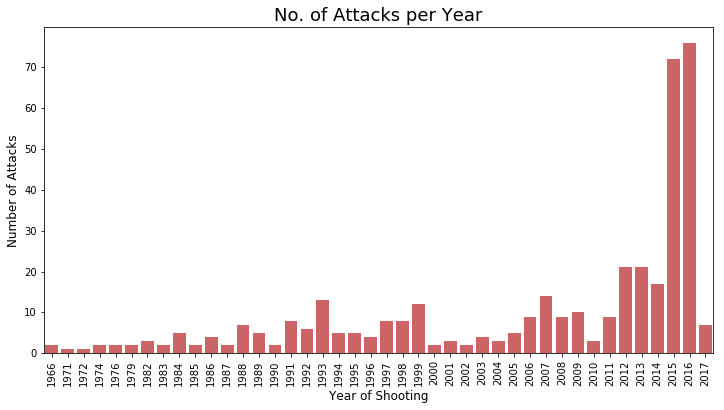

In [11]:
ms['Year'] = ms['Date'].dt.year

cnt_srs = ms['Year'].value_counts()
plt.figure(figsize=(12,6))
sns.barplot(cnt_srs.index, cnt_srs.values, alpha=0.8, color=color[3])
plt.xticks(rotation='vertical')
plt.xlabel('Year of Shooting', fontsize=12)
plt.ylabel('Number of Attacks', fontsize=12)
plt.title('No. of Attacks per Year', fontsize=18)
plt.show()

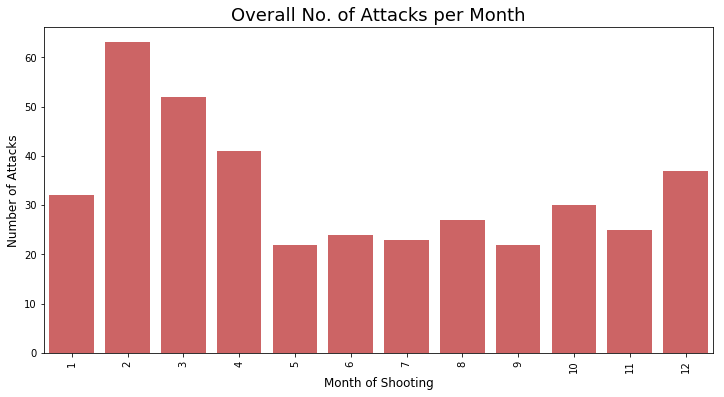

In [12]:
ms['Month'] = ms['Date'].dt.month

cnt_srs = ms['Month'].value_counts()
plt.figure(figsize=(12,6))
sns.barplot(cnt_srs.index, cnt_srs.values, alpha=0.8, color=color[3])
plt.xticks(rotation='vertical')
plt.xlabel('Month of Shooting', fontsize=12)
plt.ylabel('Number of Attacks', fontsize=12)
plt.title('Overall No. of Attacks per Month', fontsize=18)
plt.show()

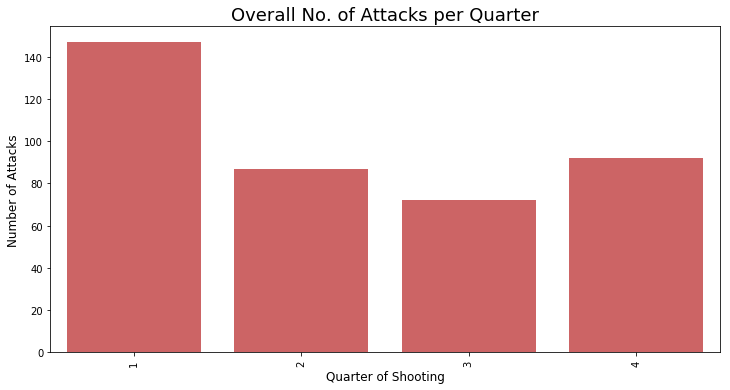

In [13]:
ms['Quarter'] = ms['Date'].dt.quarter

cnt_srs = ms['Quarter'].value_counts()
plt.figure(figsize=(12,6))
sns.barplot(cnt_srs.index, cnt_srs.values, alpha=0.8, color=color[3])
plt.xticks(rotation='vertical')
plt.xlabel('Quarter of Shooting', fontsize=12)
plt.ylabel('Number of Attacks', fontsize=12)
plt.title('Overall No. of Attacks per Quarter', fontsize=18)
plt.show()

*No of shooting attacks in first quarter are almost 2 times higher than other quarters. 
This can be further dig down on locations to see the state/city specific trends. *

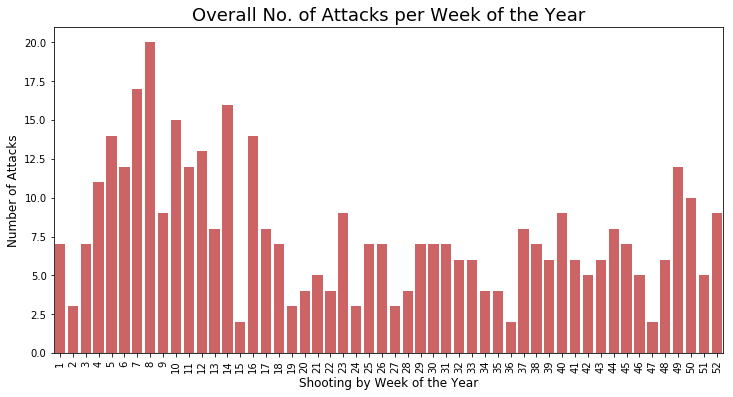

In [14]:
ms['WoY'] = ms['Date'].dt.weekofyear

cnt_srs = ms['WoY'].value_counts()
plt.figure(figsize=(12,6))
sns.barplot(cnt_srs.index, cnt_srs.values, alpha=0.8, color=color[3])
plt.xticks(rotation='vertical')
plt.xlabel('Shooting by Week of the Year', fontsize=12)
plt.ylabel('Number of Attacks', fontsize=12)
plt.title('Overall No. of Attacks per Week of the Year', fontsize=18)
plt.show()


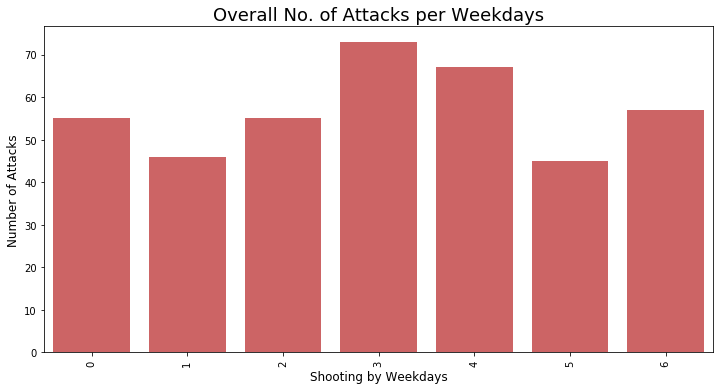

In [15]:
ms['DoW'] = ms['Date'].dt.dayofweek

cnt_srs = ms['DoW'].value_counts()
plt.figure(figsize=(12,6))
sns.barplot(cnt_srs.index, cnt_srs.values, alpha=0.8, color=color[3])
plt.xticks(rotation='vertical')
plt.xlabel('Shooting by Weekdays', fontsize=12)
plt.ylabel('Number of Attacks', fontsize=12)
plt.title('Overall No. of Attacks per Weekdays', fontsize=18)
plt.show()

*Zero represents Monday and 6 represents Sunday.*

*So, the shooting attacks are high on Thursday and Friday. *

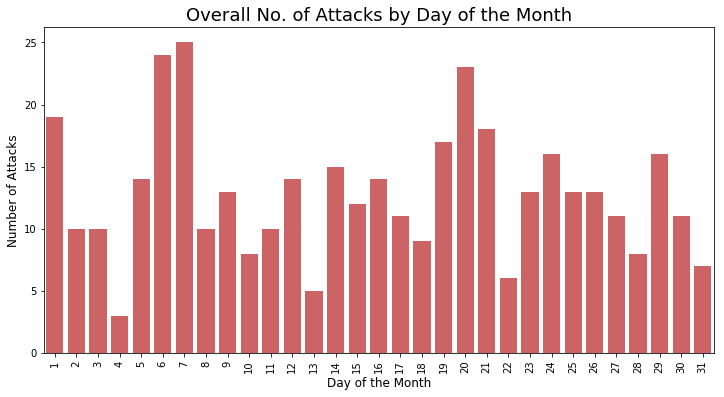

In [16]:
ms['DoM'] = ms['Date'].dt.day

cnt_srs = ms['DoM'].value_counts()
plt.figure(figsize=(12,6))
sns.barplot(cnt_srs.index, cnt_srs.values, alpha=0.8, color=color[3])
plt.xticks(rotation='vertical')
plt.xlabel('Day of the Month', fontsize=12)
plt.ylabel('Number of Attacks', fontsize=12)
plt.title('Overall No. of Attacks by Day of the Month', fontsize=18)
plt.show()

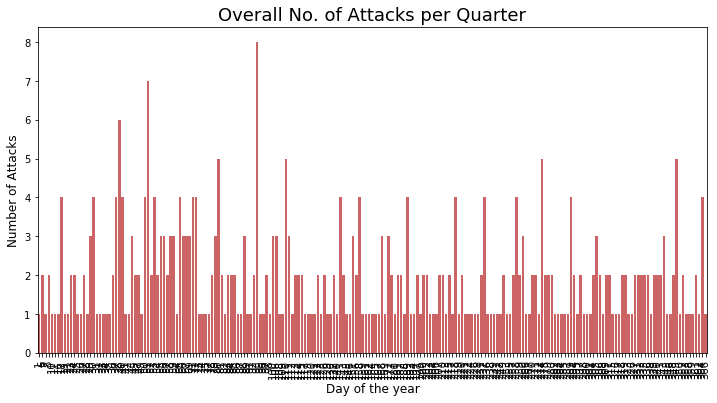

In [17]:
ms['DoY'] = ms['Date'].dt.dayofyear

cnt_srs = ms['DoY'].value_counts()
plt.figure(figsize=(12,6))
sns.barplot(cnt_srs.index, cnt_srs.values, alpha=0.8, color=color[3])
plt.xticks(rotation='vertical')
plt.xlabel('Day of the year', fontsize=12)
plt.ylabel('Number of Attacks', fontsize=12)
plt.title('Overall No. of Attacks per Quarter', fontsize=18)
plt.show()

Lets look shooting attacks pattren into weekdays and weekends perspective.

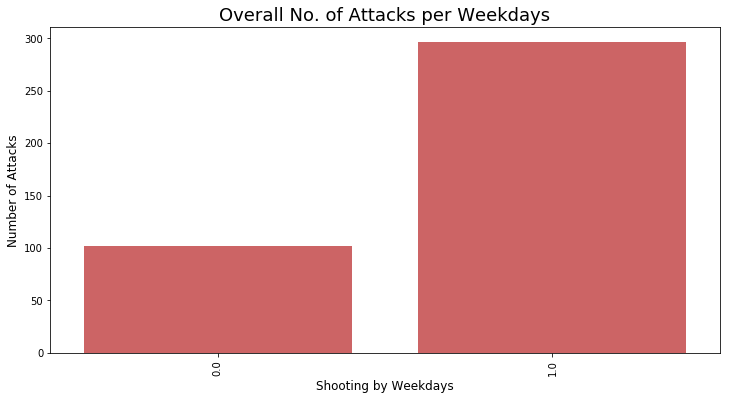

In [18]:
ms['weekdayflg'] =( ms['DoW'] // 5 != 1).astype(float)

cnt_srs = ms['weekdayflg'].value_counts()
plt.figure(figsize=(12,6))
sns.barplot(cnt_srs.index, cnt_srs.values, alpha=0.8, color=color[3])
plt.xticks(rotation='vertical')
plt.xlabel('Shooting by Weekdays', fontsize=12)
plt.ylabel('Number of Attacks', fontsize=12)
plt.title('Overall No. of Attacks per Weekdays', fontsize=18)
plt.show()


*No. of shooting attacks are ~3 times high on weekdays as compare to weekends*
By considering this, we can think of what could be the motives of this. **If we merge and dig into news data with +2/-2 days, we can better find the reasons.**

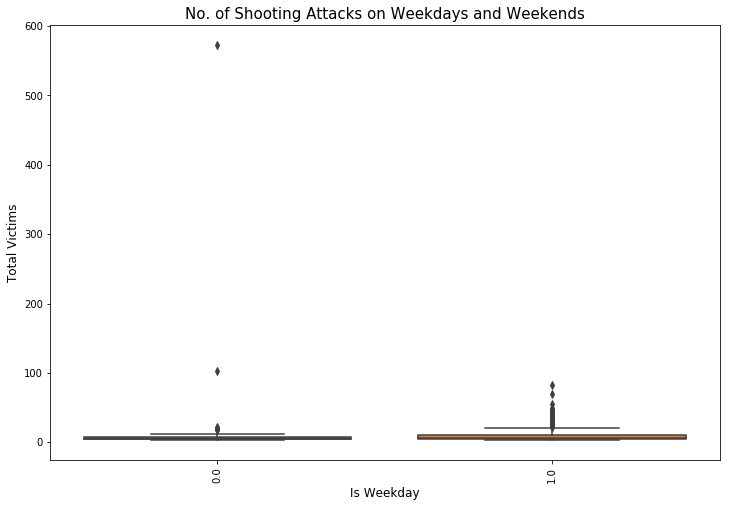

In [19]:
plt.figure(figsize=(12,8))
sns.boxplot(x="weekdayflg", y="Total victims", data=ms)
plt.ylabel('Total Victims', fontsize=12)
plt.xlabel('Is Weekday', fontsize=12)
plt.xticks(rotation='vertical')
plt.title("No. of Shooting Attacks on Weekdays and Weekends", fontsize=15)
plt.show()

Lets replot this graph by excluding one extreme/outlier value.

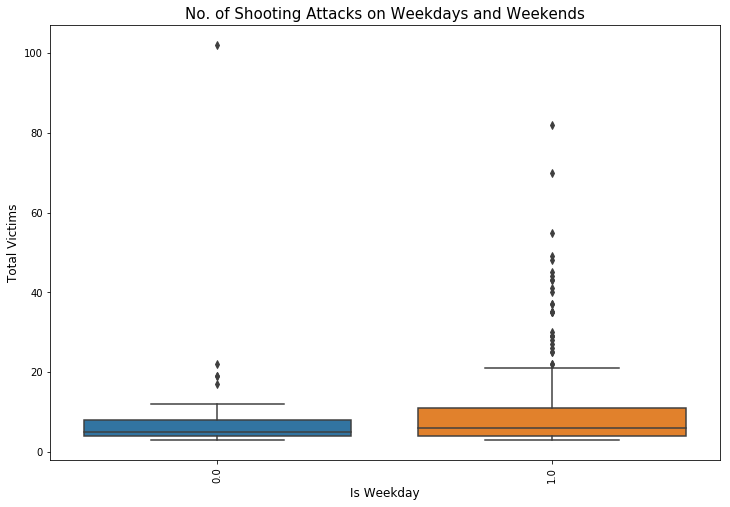

In [20]:
plt.figure(figsize=(12,8))
sns.boxplot(x="weekdayflg", y="Total victims", data=ms[ms['Total victims'] < 500])
plt.ylabel('Total Victims', fontsize=12)
plt.xlabel('Is Weekday', fontsize=12)
plt.xticks(rotation='vertical')
plt.title("No. of Shooting Attacks on Weekdays and Weekends", fontsize=15)
plt.show()   

*We can observe that 25% - 75%  victims lie between 4-14 on Weekdays and 4-9 on Weekends*

** Mass Shooting over the Location:**
Let's split Location to look deep into targeted areas

In [21]:
ms['City'] = ms['Location'].str.rpartition(',')[0]#.str.replace(",", " ")
ms['State'] = ms['Location'].str.rpartition(',')[2]

In [23]:
ms[ms[['City']].apply(lambda x: x[0].isdigit(), axis=1)].head(10)

S#                                      Title Location       Date  \
82  83             Residence in Lakeland, Florida  42375,  2016-01-06   
81  82             Roadside in Memphis, Tennessee  42376,  2016-01-07   
80  81                     Wilmington, DE robbery  42380,  2016-01-11   
79  80         Gloucester County, VA, House Party  42386,  2016-01-17   
78  79                       Los Angeles Drive-by  42392,  2016-01-23   
77  78                      Florida family murder  42392,  2016-01-23   
76  77     Perris, CA Mexican restaurant shooting  42394,  2016-01-25   
75  76       Chesapeake, VA Family Murder Suicide  42396,  2016-01-27   
73  74  Caroline County, VA Family Murder Suicide  42398,  2016-01-29   
72  73          Glendale, AZ House Party shooting  42399,  2016-01-30   

                                              Summary  Fatalities  Injured  \
82  Two men arrived at the house of a drug dealer ...           3        1   
81  A woman flagged down a car to help her with he...           1        3   
80  Two men forcefully entered a house, and starte...           1        4   
79  A young woman threw a house party for her birt...           1        3   
78  Group of people was standing outside of a Liqu...           2        2   
77  A young man shot his mother, step-father, and ...           3        0   
76  Very little is known about the case. Cops were...           1        4   
75  26-year-old killed his Mother, Father, Grandmo...           6        0   
73  42-year-old husband murders wife, shoots two y...           2        2   
72  Altercation broke out at a house party. A grou...           3        5   

    Total victims Mental Health Issues                                 Race  \
82              4              Unknown   Black American or African American   
81              4              Unknown                              Unknown   
80              5              Unknown   Black American or African American   
79              4              Unknown   Black American or African American   
78              4              Unknown                              Unknown   
77              3              Unknown  White American or European American   
76              5              Unknown                              Unknown   
75              5              Unknown  White American or European American   
73              3              Unknown                              Unknown   
72              8              Unknown                              Unknown   

     Gender   Latitude   Longitude  Year  Month  Quarter  WoY  DoW  DoM  DoY  \
82     Male  28.039465  -81.949804  2016      1        1    1    2    6    6   
81  Unknown  35.149534  -90.048980  2016      1        1    1    3    7    7   
80     Male  39.739072  -75.539788  2016      1        1    2    0   11   11   
79     Male  37.402640  -76.458559  2016      1        1    2    6   17   17   
78  Unknown  34.052234 -118.243685  2016      1        1    3    5   23   23   
77     Male  30.754181  -86.572799  2016      1        1    3    5   23   23   
76     Male  33.782519 -117.228648  2016      1        1    4    0   25   25   
75     Male  36.768209  -76.287493  2016      1        1    4    2   27   27   
73     Male  38.044556  -77.286488  2016      1        1    4    4   29   29   
72     Male  33.538652 -112.185987  2016      1        1    4    5   30   30   

    weekdayflg   City State  
82         1.0  42375        
81         1.0  42376        
80         1.0  42380        
79         0.0  42386        
78         0.0  42392        
77         0.0  42392        
76         1.0  42394        
75         1.0  42396        
73         1.0  42398        
72         0.0  42399

**Now, we will explore that in  which States and Cities shooting incidents are common.**

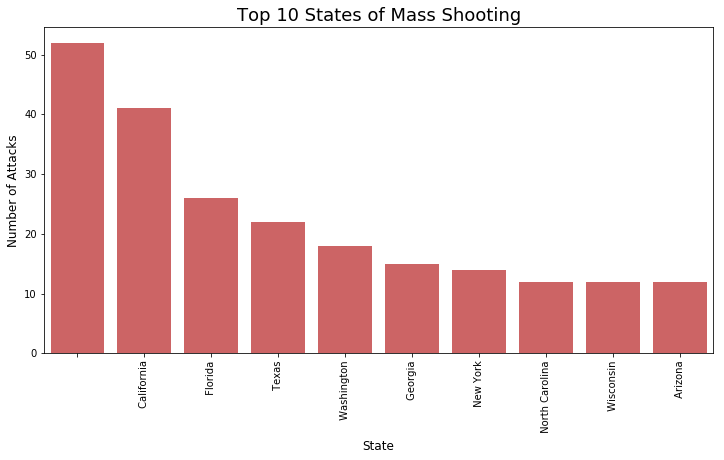

In [24]:
cnt_srs = ms['State'].value_counts()
cnt_srs = cnt_srs.head(10)
plt.figure(figsize=(12,6))
sns.barplot(cnt_srs.index, cnt_srs.values, alpha=0.8, color=color[3])
plt.xticks(rotation='vertical')
plt.xlabel('State', fontsize=12)
plt.ylabel('Number of Attacks', fontsize=12)
plt.title('Top 10 States of Mass Shooting', fontsize=18)
plt.show()

*The first bar is representing the missing values of zipcodes. Other than this, California, Florida and Texas are the top three states where shooting incidents are high*

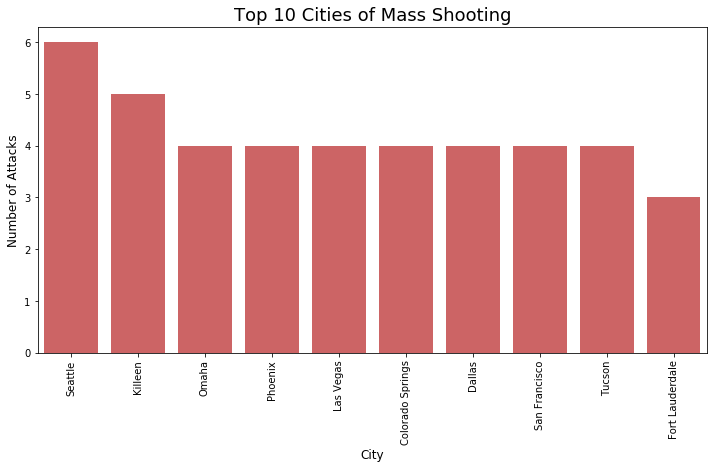

In [25]:
cnt_srs = ms['City'].value_counts()
cnt_srs = cnt_srs.head(10)
plt.figure(figsize=(12,6))
sns.barplot(cnt_srs.index, cnt_srs.values, alpha=0.8, color=color[3])
plt.xticks(rotation='vertical')
plt.xlabel('City', fontsize=12)
plt.ylabel('Number of Attacks', fontsize=12)
plt.title('Top 10 Cities of Mass Shooting', fontsize=18)
plt.show()

Here, we will explore the latitude and longitude variables as well.

In [26]:
ms['text'] = ms['Date'].dt.strftime('%B %-d'
                          ) + ', ' + ms['Fatalities'].astype(str) + ' Fatalities'

data = [dict(
        type = 'scattergeo',
        locationmode = 'USA-states',
        lon = ms[ms.Longitude < 0]['Longitude'],
        lat = ms[ms.Longitude < 0]['Latitude'],
        text = ms[ms.Longitude < 0]['text'],
        mode = 'markers',
        marker = dict( 
            size = ms[ms.Longitude < 0]['Fatalities'] ** 0.5 * 5,
            opacity = 0.75,
            color = 'rgb(215, 0, 0)')
        )]

layout = dict(
         title = 'Shooting Fatalities by Latitude/Longitude in United States <br>'
                 '<sub>Hover to View Date and Fatalitiess</sub>',
         geo = dict(
             scope = 'usa',
             projection = dict(type = 'albers usa'),
             showland = True,
             landcolor = 'rgb(250, 250, 250)',
             subunitwidth = 1,
             subunitcolor = 'rgb(217, 217, 217)',
             countrywidth = 1,
             countrycolor = 'rgb(217, 217, 217)',
             showlakes = True,
             lakecolor = 'rgb(255, 255, 255)')
         )

figure = dict(data = data, layout = layout)
iplot(figure)

**Lets observe the behavior by Gender, Race, and  Mental Health Issues**

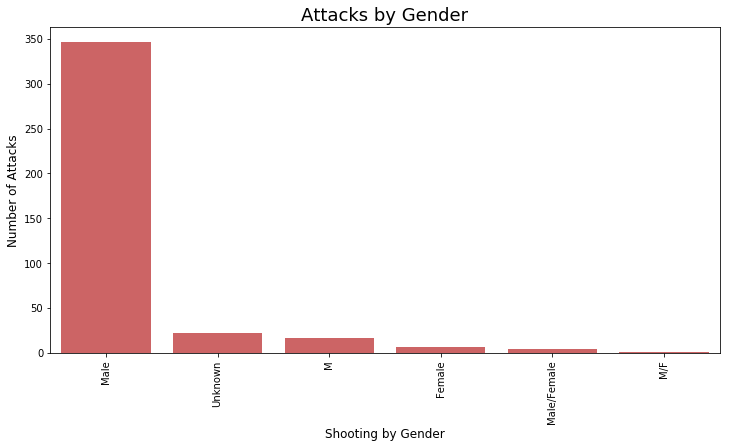

In [27]:
cnt_srs = ms['Gender'].value_counts()
plt.figure(figsize=(12,6))
sns.barplot(cnt_srs.index, cnt_srs.values, alpha=0.8, color=color[3])
plt.xticks(rotation='vertical')
plt.xlabel('Shooting by Gender', fontsize=12)
plt.ylabel('Number of Attacks', fontsize=12)
plt.title('Attacks by Gender', fontsize=18)
plt.show()

*Data in Gender column is very rough. Lets fix the values for further analysis. Moreover, Mostly shooter are Male.*

In [28]:
ms.Gender.replace(['M', 'M/F'], ['Male', 'Male/Female'], inplace=True)

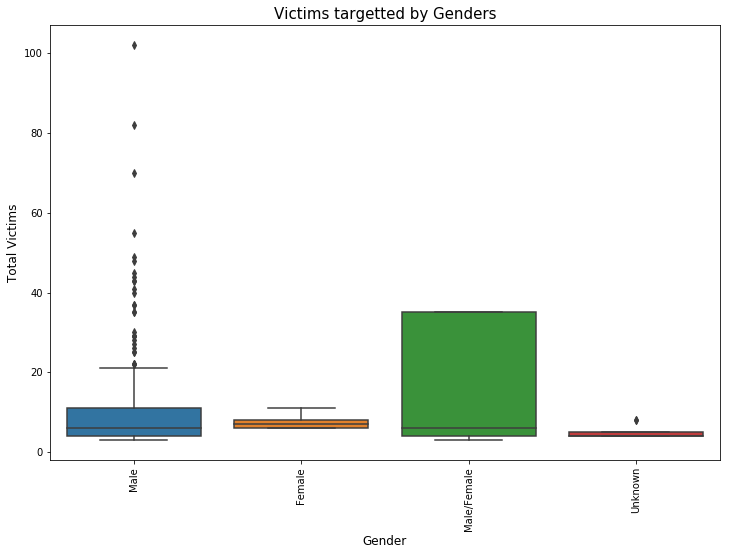

In [29]:
plt.figure(figsize=(12,8))
sns.boxplot(x="Gender", y="Total victims", data=ms)
plt.ylabel('Total Victims', fontsize=12)
plt.xlabel('Gender', fontsize=12)
plt.xticks(rotation='vertical')
plt.title("Victims targetted by Genders", fontsize=15)
plt.show()

Wow.. This graph strangely reveals that Male/Female *(Male Shooter with Female)* are more destructive for the community. 
Lets see in which City and State these Male+Female shooting activities are high.

In [30]:
ms[ms['Gender'] == "Male/Female"][['Race', 'Mental Health Issues', 'State','City', 'Total victims']]

Race Mental Health Issues  \
245                White American or European American                   No   
162                White American or European American                   No   
145  White American or European American/Some other...                   No   
84                                               Other              Unclear   
85                                      Asian American              Unknown   

           State             City  Total victims  
245   Washington        Carnation              6  
162       Nevada        Las Vegas              3  
145      Florida  New Port Richey              4  
84    California   San Bernardino             35  
85    California   San Bernardino             35

*The Race of Shooter White American or European American is high *

**Lets Look into Races**

I have aligned few values to make the visual more readable.

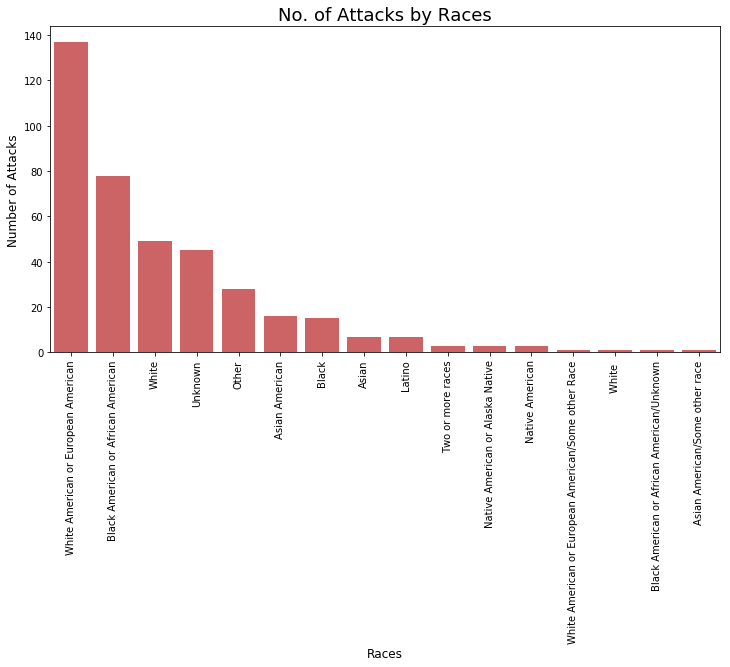

In [31]:
ms.Race.replace(['white', 'black', 'Some other race', 'unclear'], ['White', 'Black', 'Other','Unknown'], inplace=True)

cnt_srs = ms['Race'].value_counts()
plt.figure(figsize=(12,6))
sns.barplot(cnt_srs.index, cnt_srs.values, alpha=0.8, color=color[3])
plt.xticks(rotation='vertical')
plt.xlabel('Races', fontsize=12)
plt.ylabel('Number of Attacks', fontsize=12)
plt.title('No. of Attacks by Races', fontsize=18)
plt.show()

*White American or European American Race is way high then others. If we combine White with it, it will become twice higher than Black American or Afican American Race*

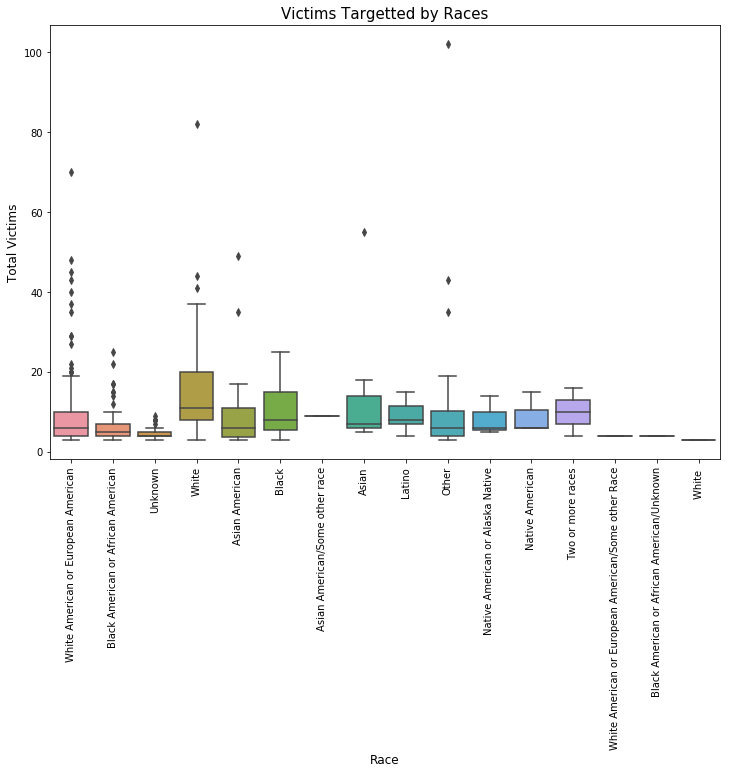

In [32]:
plt.figure(figsize=(12,8))
sns.boxplot(x="Race", y="Total victims", data=ms)
plt.ylabel('Total Victims', fontsize=12)
plt.xlabel('Race', fontsize=12)
plt.xticks(rotation='vertical')
plt.title("Victims Targetted by Races", fontsize=15)
plt.show()

In [33]:
ms['Mental Health Issues'].replace(['unknown', 'unclear', 'Unclear'], ['Unknown','Unclear', 'Unclear'], inplace=True)

**Mental Health Issues**

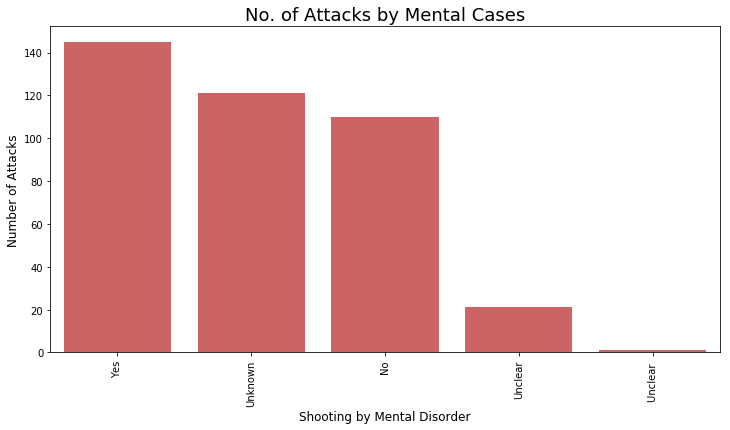

In [34]:
cnt_srs = ms['Mental Health Issues'].value_counts()
plt.figure(figsize=(12,6))
sns.barplot(cnt_srs.index, cnt_srs.values, alpha=0.8, color=color[3])
plt.xticks(rotation='vertical')
plt.xlabel('Shooting by Mental Disorder', fontsize=12)
plt.ylabel('Number of Attacks', fontsize=12)
plt.title('No. of Attacks by Mental Cases', fontsize=18)
plt.show()

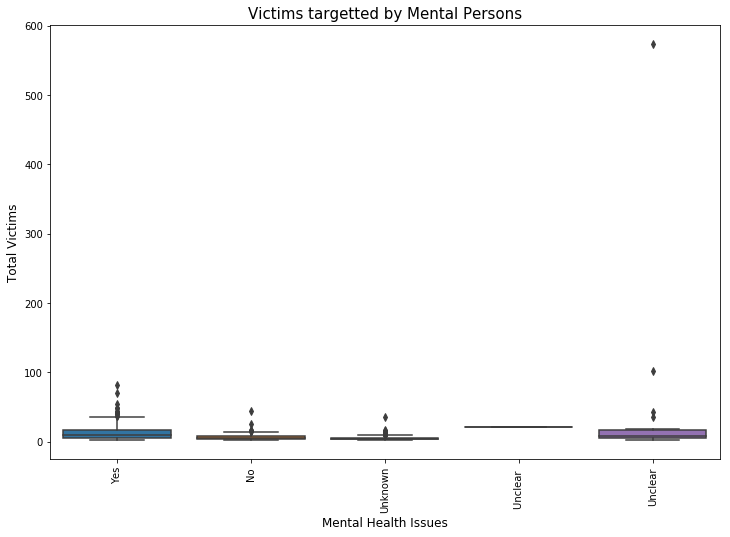

In [35]:
plt.figure(figsize=(12,8))
sns.boxplot(x="Mental Health Issues", y="Total victims", data=ms)
plt.ylabel('Total Victims', fontsize=12)
plt.xlabel('Mental Health Issues', fontsize=12)
plt.xticks(rotation='vertical')
plt.title("Victims targetted by Mental Persons", fontsize=15)
plt.show()

**Now we will see how much destruction mental cases has caused.**

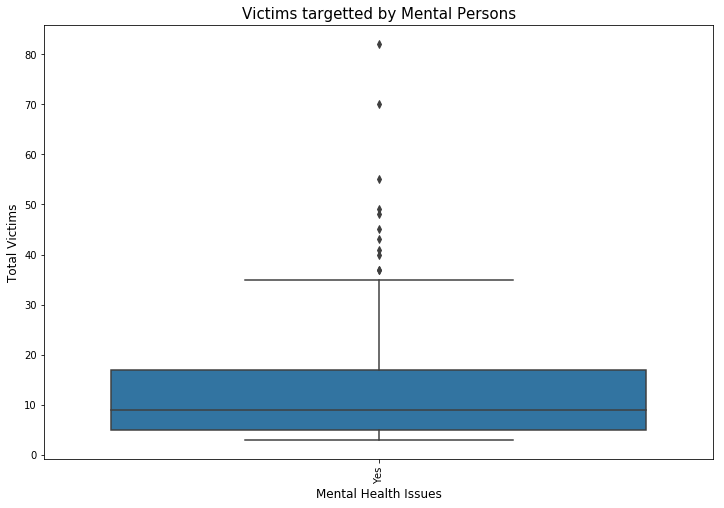

In [36]:
plt.figure(figsize=(12,8))
sns.boxplot(x="Mental Health Issues", y="Total victims", data=ms[ms['Mental Health Issues'] == 'Yes'] )
plt.ylabel('Total Victims', fontsize=12)
plt.xlabel('Mental Health Issues', fontsize=12)
plt.xticks(rotation='vertical')
plt.title("Victims targetted by Mental Persons", fontsize=15)
plt.show()

*Majority victims lies between 5 - 18 which are affected by mental disorder persons.*

Now, lets plot the bubble chart for Deaths, Injuries and Total Victims in all States

ValueError: 'c' argument has 54 elements, which is not acceptable for use with 'x' with size 398, 'y' with size 398.

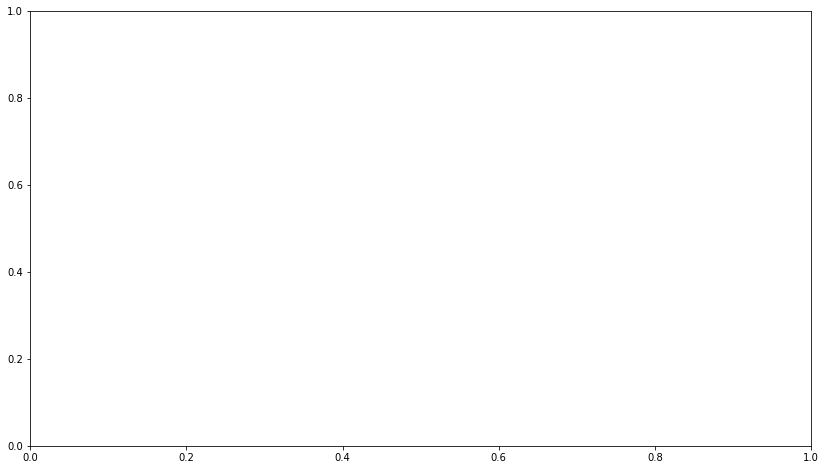

In [37]:
ms1 = ms
plt.figure(figsize=(14,8))

N = ms1.State.value_counts().size
# Choose some random colors
colors=cm.rainbow(np.random.rand(N))

# Use those colors as the color argument
plt.scatter(ms1.Fatalities, ms1.Injured, s=ms['Total victims'],color=colors)
for i in range(N):
    plt.annotate(ms1.State[i],xy=(ms1.Fatalities[i],ms1.Injured[i]))
plt.xlabel('Deaths')
plt.ylabel('Injuries')
# Move title up with the "y" option
plt.title('Deaths, Injuries and Total Victims in all States',y=1.05)
plt.show()


**News Summary**
Lets explore the field of summary which contain the information of incident.

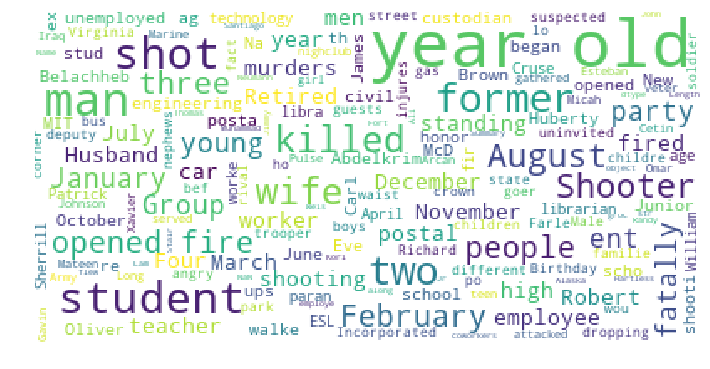

In [41]:
from subprocess import check_output
from wordcloud import WordCloud, STOPWORDS
stopwords = set(STOPWORDS)

wordcloud = WordCloud(
                          background_color='white',
                          stopwords=stopwords,
                          max_words=200,
                          max_font_size=40, 
                          random_state=42
                         ).generate(str(ms['Summary']))

plt.figure(figsize=(12,8))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

Previously, we observed that most destruction occured when man was joined by a women. Let filter the data to see the buzz words of those incidents.

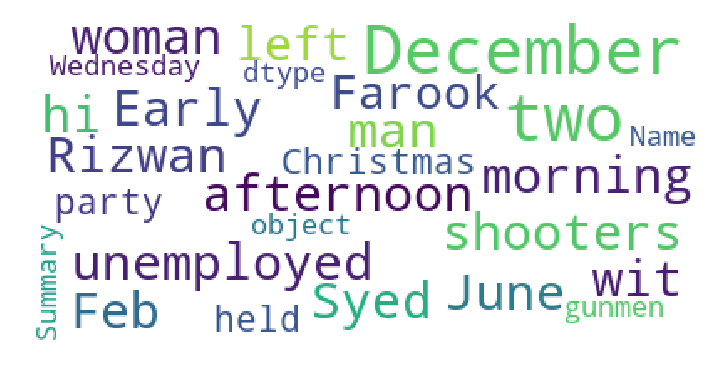

In [42]:
wordcloud = WordCloud(
                          background_color='white',
                          stopwords=stopwords,
                          max_words=200,
                          max_font_size=40, 
                          random_state=42
                         ).generate(str(ms[ms['Gender'] == "Male/Female"]['Summary']))

plt.figure(figsize=(12,8))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

Now, we are looking into the Race of White American or European American which is high.

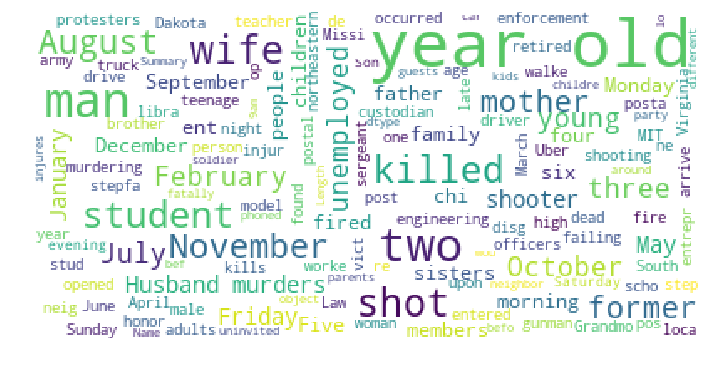

In [43]:
wordcloud = WordCloud(
                          background_color='white',
                          stopwords=stopwords,
                          max_words=200,
                          max_font_size=40, 
                          random_state=42
                         ).generate(str(ms[ms['Race'] == "White American or European American"]['Summary']))

plt.figure(figsize=(12,8))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

Now, Lets look into Mental Health Issues cases...

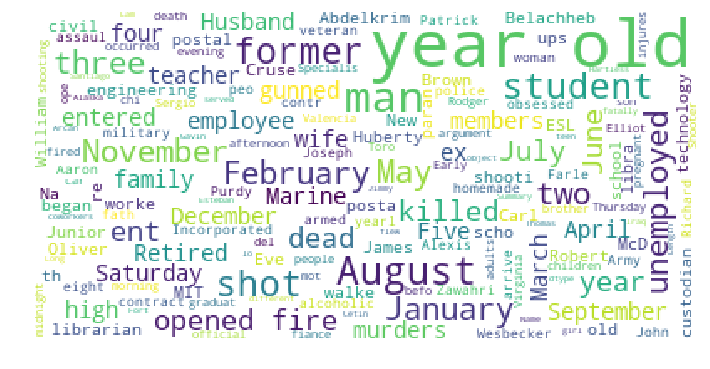

In [44]:
wordcloud = WordCloud(
                          background_color='white',
                          stopwords=stopwords,
                          max_words=200,
                          max_font_size=40, 
                          random_state=42
                         ).generate(str(ms[ms['Mental Health Issues'] == 'Yes']['Summary']))

plt.figure(figsize=(12,8))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

In mental cases, we can observe that these are the cases of Unemployed+Man+ Old+ Opened fired. So, we can say that when people are unemployed for a long time, it caused them frustrated. And so it leads to extreme action.  

I have covered analysis of Summary field by generating word clouds to see the buzz words. This data is required little more cleaning and transformation.
That's all for now, but stay tuned. In next version I will enhance Location based analysis and I will also try to cover City and States from Lat Lon variables to stream the data. generate more insights.  

> Thanking you in antipication and looking forward for comments.